In [1]:
from typing import Optional, Dict
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tiktoken  # OpenAI's tokenizer
import os
import sys

# Add the parent directory of `src/` to the Python path
sys.path.append(os.path.abspath(".."))
import src.ml_train_evaluation as ml

# Set the TF_DETERMINISTIC_OPS environment variable to '1'
os.environ['TF_DETERMINISTIC_OPS'] = '1'

/home/stud/shfreja/bhome/.venv/llm_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-21 14:03:20.796788: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [178]:
import os
import glob
import pandas as pd

# Path to your evaluation results
results_path = "../results/evaluation/utility"

# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(results_path, "*.csv"))

# Read and concatenate all CSVs
df_list = []
for file in csv_files:
    temp_df = pd.read_csv(file)
    temp_df["source_file"] = os.path.basename(file)  # Keep track of origin
    df_list.append(temp_df)

# Concatenate into one DataFrame
all_results = pd.concat(df_list, ignore_index=True)
all_results["dataset_model"] = all_results["dataset"].astype(str) + "-" + all_results["GAN_method"].astype(str)

short_map = {
    "Aegis2-LLM_FT_Mistral": "A_FTmist",
    "Aegis2-LLM_Mistral": "A_mist",
    "Aegis2-LLM_qwen": "A_qwen",
    "wildguardmix-LLM_FT_Mistral": "W_FTmist",
    "wildguardmix-LLM_Mistral": "W_mist",
    "wildguardmix-LLM_qwen": "W_qwen"
}

all_results["dataset_model_short"] = all_results["dataset_model"].replace(short_map)

# Save combined results
output_file = os.path.join(results_path, "all_utility_evaluation.csv")

all_results.to_csv(output_file, index=False)

print(f"✅ Combined results saved to {output_file}")
print(f"Shape: {all_results.shape}")

all_results.head(15)

✅ Combined results saved to ../results/evaluation/utility/all_utility_evaluation.csv
Shape: (48, 10)


dataset      GAN_method ml_model method       acc  f1_score  \
0   wildguardmix     LLM_Mistral       GB   TRTR  0.867308  0.863366   
1   wildguardmix     LLM_Mistral       LR   TRTR  0.932692  0.933837   
2   wildguardmix     LLM_Mistral       RF   TRTR  0.863462  0.851775   
3   wildguardmix     LLM_Mistral      SVM   TRTR  0.925000  0.926276   
4   wildguardmix     LLM_Mistral       GB   TSTR  0.721154  0.638404   
5   wildguardmix     LLM_Mistral       LR   TSTR  0.723077  0.766234   
6   wildguardmix     LLM_Mistral       RF   TSTR  0.798077  0.783505   
7   wildguardmix     LLM_Mistral      SVM   TSTR  0.778846  0.806723   
8         Aegis2  LLM_FT_Mistral       GB   TRTR  0.668750  0.631944   
9         Aegis2  LLM_FT_Mistral       LR   TRTR  0.696875  0.675585   
10        Aegis2  LLM_FT_Mistral       RF   TRTR  0.637500  0.600000   
11        Aegis2  LLM_FT_Mistral      SVM   TRTR  0.678125  0.648464   
12        Aegis2  LLM_FT_Mistral       GB   TSTR  0.640625  0.650456   
13        Aegis2  LLM_FT_Mistral       LR   TSTR  0.609375  0.647887   
14        Aegis2  LLM_FT_Mistral       RF   TSTR  0.628125  0.591065   

         auc                                 source_file  \
0   0.947574  utility_evalution_wildguardmix_results.csv   
1   0.972160  utility_evalution_wildguardmix_results.csv   
2   0.948565  utility_evalution_wildguardmix_results.csv   
3   0.972249  utility_evalution_wildguardmix_results.csv   
4   0.848987  utility_evalution_wildguardmix_results.csv   
5   0.885680  utility_evalution_wildguardmix_results.csv   
6   0.800141  utility_evalution_wildguardmix_results.csv   
7   0.898757  utility_evalution_wildguardmix_results.csv   
8   0.711830      utility_evalution_FT_Aegis_results.csv   
9   0.732732      utility_evalution_FT_Aegis_results.csv   
10  0.728766      utility_evalution_FT_Aegis_results.csv   
11  0.725563      utility_evalution_FT_Aegis_results.csv   
12  0.663580      utility_evalution_FT_Aegis_results.csv   
13  0.691163      utility_evalution_FT_Aegis_results.csv   
14  0.638029      utility_evalution_FT_Aegis_results.csv   

               dataset_model dataset_model_short  
0   wildguardmix-LLM_Mistral              W_mist  
1   wildguardmix-LLM_Mistral              W_mist  
2   wildguardmix-LLM_Mistral              W_mist  
3   wildguardmix-LLM_Mistral              W_mist  
4   wildguardmix-LLM_Mistral              W_mist  
5   wildguardmix-LLM_Mistral              W_mist  
6   wildguardmix-LLM_Mistral              W_mist  
7   wildguardmix-LLM_Mistral              W_mist  
8      Aegis2-LLM_FT_Mistral            A_FTmist  
9      Aegis2-LLM_FT_Mistral            A_FTmist  
10     Aegis2-LLM_FT_Mistral            A_FTmist  
11     Aegis2-LLM_FT_Mistral            A_FTmist  
12     Aegis2-LLM_FT_Mistral            A_FTmist  
13     Aegis2-LLM_FT_Mistral            A_FTmist  
14     Aegis2-LLM_FT_Mistral            A_FTmist

In [117]:
def aggregate_results(df,
                      metric: str = "f1_score",
                      agg: str = "best",
                      ml_model: str | None = None):
    """
    Return one row per (dataset_model_short, method).
    - metric: 'acc', 'f1_score', or 'auc'
    - agg='best'  -> pick row with max metric per group (across ml_model)
    - agg='mean'  -> mean across ml_model
    - agg='median'-> median across ml_model
    - ml_model='LR' (or 'RF'/'SVM'/'GB') -> filter to that model first
    """

    if "dataset_model_short" not in df.columns:
        raise ValueError("DataFrame must contain 'dataset_model_short' column")

    group_cols = ["dataset_model_short", "method"]

    if ml_model is not None:
        dff = df[df["ml_model"].str.upper() == ml_model.upper()].copy()
        out = (dff[group_cols + [metric]]
               .groupby(group_cols, as_index=False)
               .mean(numeric_only=True))
        return out

    if agg == "best":
        idx = (df.groupby(group_cols)[metric].idxmax())
        out = df.loc[idx, group_cols + [metric]].reset_index(drop=True)
    elif agg in ("mean", "median"):
        func = np.mean if agg == "mean" else np.median
        out = (df[group_cols + [metric]]
               .groupby(group_cols, as_index=False)
               .agg({metric: func}))
    else:
        raise ValueError("agg must be one of {'best','mean','median'}")

    return out


def plot_utility_grouped_short(dfagg,
                               metric: str = "f1_score",
                               title: str | None = None,
                               bar_width: float = 0.38,
                               value_fmt: str = "{:.2f}",
                               rotate: int = 25,
                               savepath: str | None = None):
    dfagg = dfagg.copy()

    # Use the short dataset–model column directly
    if "dataset_model_short" not in dfagg.columns:
        raise ValueError("DataFrame must contain a 'dataset_model_short' column")

    dfagg["group"] = dfagg["dataset_model_short"]

    methods = ["TRTR", "TSTR"]
    pivot = dfagg.pivot_table(index="group", columns="method", values=metric, aggfunc="first")
    for m in methods:
        if m not in pivot.columns:
            pivot[m] = np.nan
    pivot = pivot[methods].sort_index()

    x = np.arange(len(pivot.index))
    fig, ax = plt.subplots(figsize=(6,4.5))

    # Define colors for TRTR/TSTR (consistent with your earlier setup)
    method_colors = {"TRTR": "#6FA8DC", "TSTR": "#E06666"}

    for i, m in enumerate(methods):
        vals = pivot[m].values.astype(float)
        bar = ax.bar(x + (i-0.5)*bar_width, vals,
                     width=bar_width,
                     label=m,
                     color=method_colors.get(m, None))
        for rect, v in zip(bar, vals):
            if not np.isnan(v):
                ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+0.01,
                        value_fmt.format(v),
                        ha='center', va='bottom',
                        fontsize=7, fontfamily="monospace", color="grey")

    ylabel = "F1 Score" if metric=="f1_score" else ("ROC-AUC" if metric.lower()=="auc" else metric)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(pivot.index, rotation=rotate, ha="right", fontsize=8)
    ax.set_ylim(0, 1.05)
    ax.set_title(title or f"Utility comparison • {ylabel}")

    # Legend with border, placed below
    ax.legend(title="Utility Methodology",
              loc="upper center", bbox_to_anchor=(0.5, -0.15),
              ncol=2, frameon=True, edgecolor="grey")

    ax.grid(axis="y", linestyle="--", alpha=0.35)
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=200, bbox_inches="tight")
    plt.show()


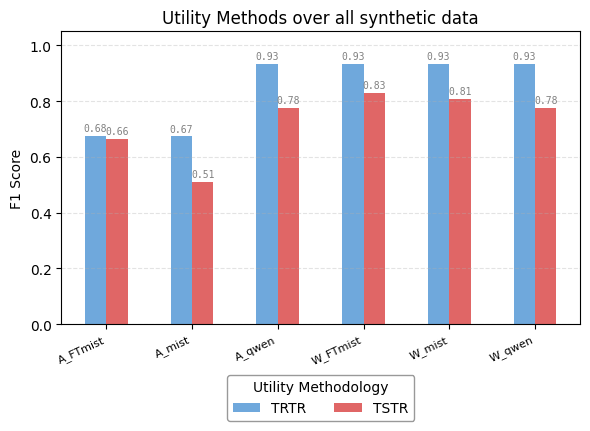

In [124]:
# Step 1: aggregate
dfagg = aggregate_results(all_results, metric="f1_score", agg="best")

# Step 2: plot
plot_utility_grouped_short(dfagg,
                           metric="f1_score",
                           title="Utility Methods over all synthetic data",
                           bar_width=0.25)

In [187]:
# Step 1: aggregate
dfagg1 = aggregate_results(all_results, metric="f1_score", agg="best")
dfagg1

dataset_model_short method  f1_score
0             A_FTmist   TRTR  0.675585
1             A_FTmist   TSTR  0.662983
2               A_mist   TRTR  0.673333
3               A_mist   TSTR  0.510638
4               A_qwen   TRTR  0.933837
5               A_qwen   TSTR  0.776699
6             W_FTmist   TRTR  0.933837
7             W_FTmist   TSTR  0.830769
8               W_mist   TRTR  0.933837
9               W_mist   TSTR  0.806723
10              W_qwen   TRTR  0.933837
11              W_qwen   TSTR  0.776699

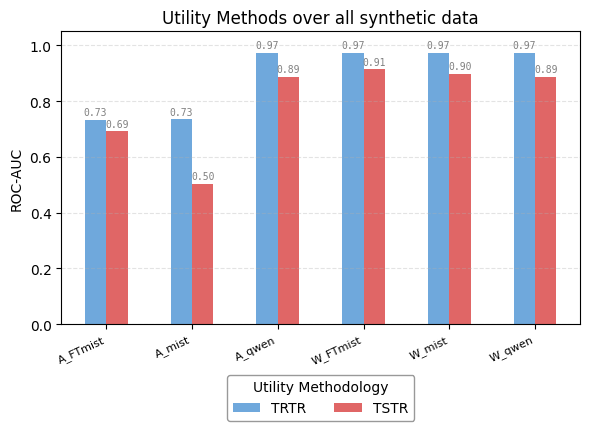

In [125]:
# Step 1: aggregate
dfagg = aggregate_results(all_results, metric="auc", agg="best")

# Step 2: plot
plot_utility_grouped_short(dfagg,
                           metric="auc",
                           title="Utility Methods over all synthetic data",
                           bar_width=0.25)

In [188]:
# Step 1: aggregate
dfagg2 = aggregate_results(all_results, metric="auc", agg="best")
dfagg2


dataset_model_short method       auc
0             A_FTmist   TRTR  0.732732
1             A_FTmist   TSTR  0.691163
2               A_mist   TRTR  0.734451
3               A_mist   TSTR  0.501387
4               A_qwen   TRTR  0.972249
5               A_qwen   TSTR  0.885592
6             W_FTmist   TRTR  0.972249
7             W_FTmist   TSTR  0.913432
8               W_mist   TRTR  0.972249
9               W_mist   TSTR  0.898757
10              W_qwen   TRTR  0.972249
11              W_qwen   TSTR  0.885592

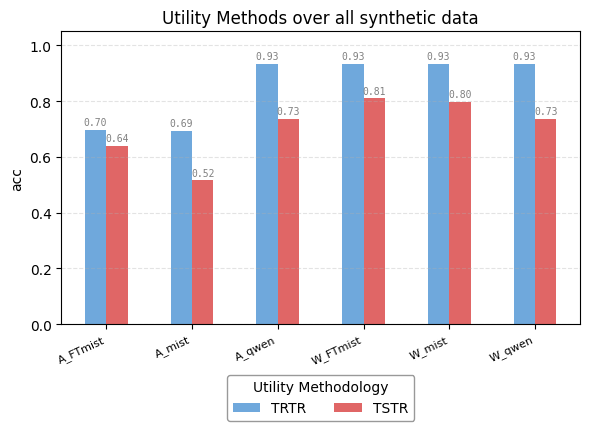

In [126]:
# Step 1: aggregate
dfagg = aggregate_results(all_results, metric="acc", agg="best")

# Step 2: plot
plot_utility_grouped_short(dfagg,
                           metric="acc",
                           title="Utility Methods over all synthetic data",
                           bar_width=0.25)

In [189]:
dfagg3 = aggregate_results(all_results, metric="acc", agg="best")
dfagg3

dataset_model_short method       acc
0             A_FTmist   TRTR  0.696875
1             A_FTmist   TSTR  0.640625
2               A_mist   TRTR  0.693750
3               A_mist   TSTR  0.515625
4               A_qwen   TRTR  0.932692
5               A_qwen   TSTR  0.734615
6             W_FTmist   TRTR  0.932692
7             W_FTmist   TSTR  0.809615
8               W_mist   TRTR  0.932692
9               W_mist   TSTR  0.798077
10              W_qwen   TRTR  0.932692
11              W_qwen   TSTR  0.734615

In [190]:
import pandas as pd

# Assume each df has columns: ["dataset_model_short", "method", "value"]
# Rename their metric column before merging
dfagg1_renamed = dfagg1.rename(columns={"acc": "f1_score"})
dfagg2_renamed = dfagg2.rename(columns={"acc": "auc"})
dfagg3_renamed = dfagg3.rename(columns={"acc": "acc"})

# Merge on dataset_model_short and method
df_merged = dfagg1_renamed.merge(dfagg2_renamed, on=["dataset_model_short", "method"])
df_merged = df_merged.merge(dfagg3_renamed, on=["dataset_model_short", "method"])

print(df_merged)


   dataset_model_short method  f1_score       auc       acc
0             A_FTmist   TRTR  0.675585  0.732732  0.696875
1             A_FTmist   TSTR  0.662983  0.691163  0.640625
2               A_mist   TRTR  0.673333  0.734451  0.693750
3               A_mist   TSTR  0.510638  0.501387  0.515625
4               A_qwen   TRTR  0.933837  0.972249  0.932692
5               A_qwen   TSTR  0.776699  0.885592  0.734615
6             W_FTmist   TRTR  0.933837  0.972249  0.932692
7             W_FTmist   TSTR  0.830769  0.913432  0.809615
8               W_mist   TRTR  0.933837  0.972249  0.932692
9               W_mist   TSTR  0.806723  0.898757  0.798077
10              W_qwen   TRTR  0.933837  0.972249  0.932692
11              W_qwen   TSTR  0.776699  0.885592  0.734615


In [179]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Choose 6 distinct colors (you can swap to your preference)
dataset_colors = {
    "A_FTmist": "#A3C8EA",   # blue
    "A_mist": "#F1A0A0",      # red
    "A_qwen": "#D0EDA5",         # green
    "W_FTmist": "#FFD09E", # orange
    "W_mist": "#B1A1E1",    # purple
    "W_qwen": "#6CD2E9"       # teal
}

def plot_three_metrics_inline(df,
                              method="TSTR",
                              agg="mean",
                              bar_width=0.5,
                              base_title="Metrics per Dataset–Model"):
    """
    One row with 3 subplots: Accuracy, AUCROC, F1-score
    Bars colored by dataset_model_short, with ONE legend.
    """
    sub = df[df["method"] == method].copy()
    if sub.empty:
        raise ValueError(f"No rows found for method={method}")

    # Aggregation
    if agg == "mean":
        agg_df = (sub.groupby("dataset_model_short")
                     [["acc","auc","f1_score"]]
                     .mean())
    elif agg == "best":
        agg_df = (sub.groupby("dataset_model_short")
                     [["acc","auc","f1_score"]]
                     .max())
    else:
        raise ValueError("agg must be 'mean' or 'best'")

    labels = agg_df.index.tolist()

    metric_titles = {"acc":"Accuracy", "auc":"AUCROC", "f1_score":"F1-score"}
    metrics = ["acc","auc","f1_score"]

    fig, axes = plt.subplots(1, 3, figsize=(12,5), sharey=True)

    for ax, metric in zip(axes, metrics):
        vals = agg_df[metric].values
        for lab, val in zip(labels, vals):
            bar = ax.bar(lab, val, color=dataset_colors[lab], width=bar_width)
            ax.text(bar[0].get_x()+bar[0].get_width()/2, val+0.01, f"{val:.2f}",
                    ha="center", va="bottom", fontsize=8)

        ax.set_ylim(0, 1.05)
        ax.set_title(metric_titles[metric])
        ax.set_ylabel("Score" if metric=="acc" else "")
        ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)
        ax.grid(axis="y", linestyle="--", alpha=0.35)

    # One shared legend
    patches = [mpatches.Patch(color=c, label=lab) for lab,c in dataset_colors.items()]
    fig.legend(handles=patches, title="Dataset|GAN_Model",
               loc="lower center", ncol=3, frameon=True, edgecolor="grey")

    fig.suptitle(f"{base_title} • {method} ({agg})", fontsize=13)
    plt.tight_layout(rect=[0,0.12,1,0.95])  # leave space for legend + title
    plt.show()


/tmp/ipykernel_2406917/2617396785.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)
/tmp/ipykernel_2406917/2617396785.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)
/tmp/ipykernel_2406917/2617396785.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)


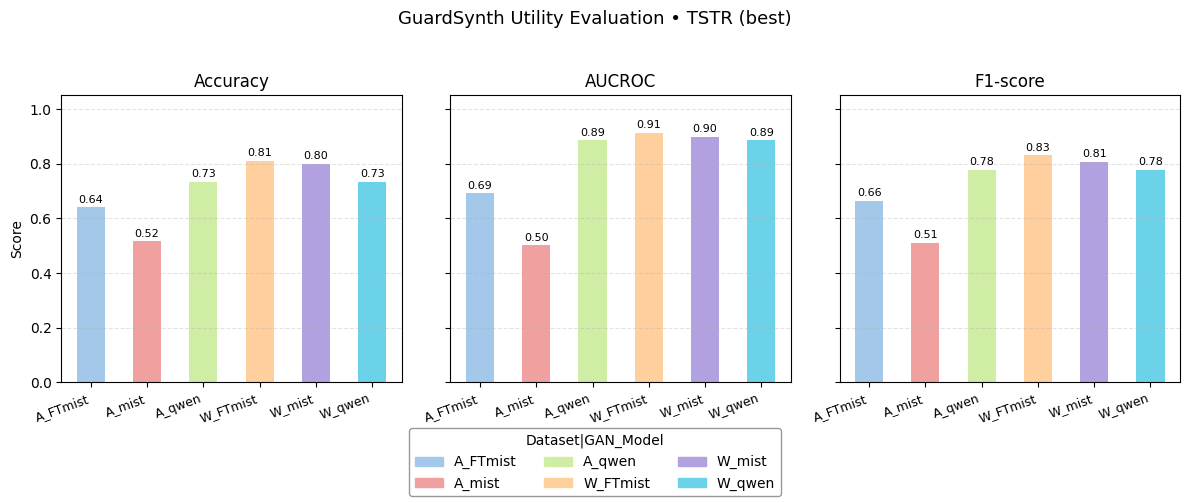

In [112]:
plot_three_metrics_inline(all_results,
                          method="TSTR",
                          agg="best",
                          base_title="GuardSynth Utility Evaluation")

/tmp/ipykernel_2406917/2193828314.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)
/tmp/ipykernel_2406917/2193828314.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)
/tmp/ipykernel_2406917/2193828314.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)


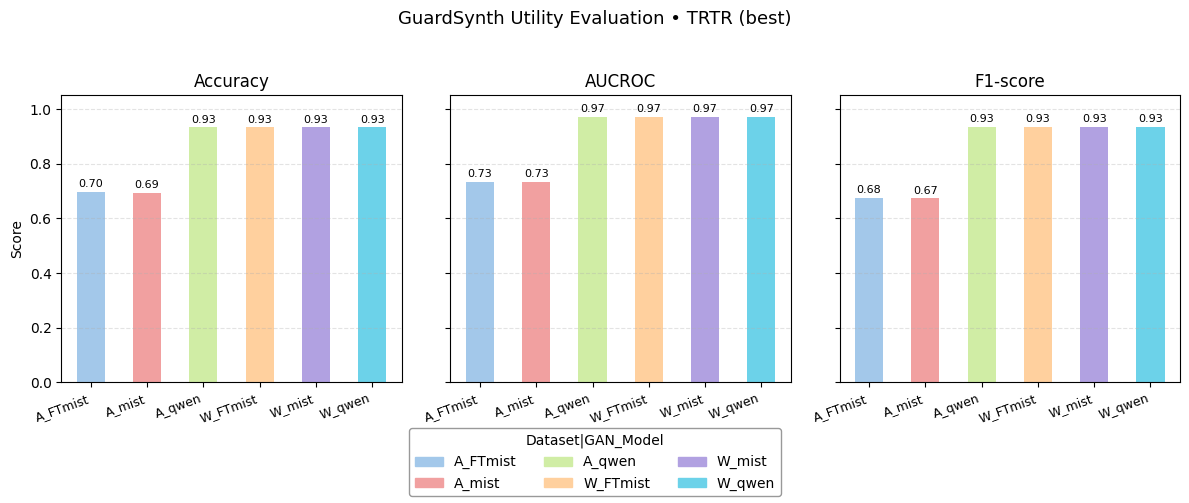

In [180]:
plot_three_metrics_inline(all_results,
                          method="TRTR",
                          agg="best",
                          base_title="GuardSynth Utility Evaluation")

/tmp/ipykernel_2406917/2617396785.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)
/tmp/ipykernel_2406917/2617396785.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)
/tmp/ipykernel_2406917/2617396785.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)


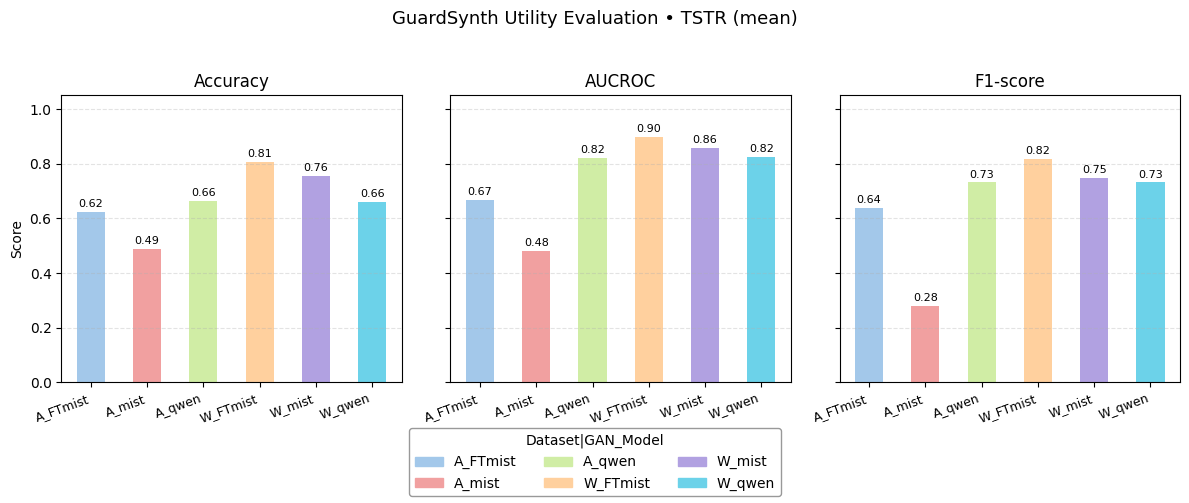

In [110]:
plot_three_metrics_inline(all_results,
                          method="TSTR",
                          agg="mean",
                          base_title="GuardSynth Utility Evaluation")

/tmp/ipykernel_2406917/2617396785.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)
/tmp/ipykernel_2406917/2617396785.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)
/tmp/ipykernel_2406917/2617396785.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=9)


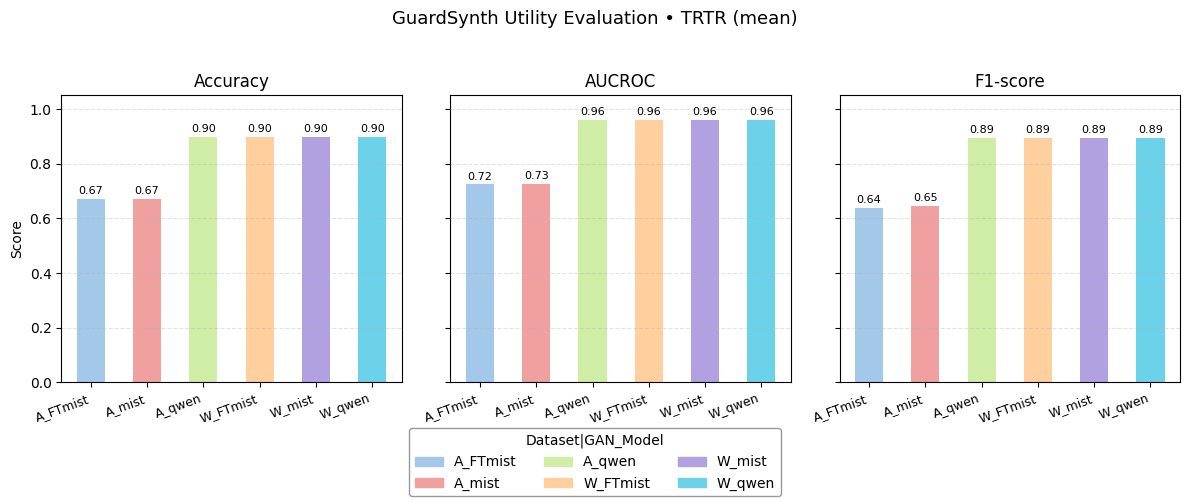

In [111]:
plot_three_metrics_inline(all_results,
                          method="TRTR",
                          agg="mean",
                          base_title="GuardSynth Utility Evaluation")

In [136]:
# fidelity_evaulation


# Path to your evaluation results
results_path = "../results/evaluation/fidelity"

# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(results_path, "*.csv"))

# Read and concatenate all CSVs
df_list = []
for file in csv_files:
    temp_df = pd.read_csv(file)
    temp_df["source_file"] = os.path.basename(file)  # Keep track of origin
    df_list.append(temp_df)

# Concatenate into one DataFrame
all_fresults = pd.concat(df_list, ignore_index=True)
all_fresults["dataset_model"] = all_fresults["dataset"].astype(str) + "-" + all_fresults["GAN_method"].astype(str)

short_map2 = {
    "Aegis2-LLM_FT_Mistral": "A_FTmist",
    "Aegis2-LLM_Mistral": "A_mist",
    "Aegis2-LLM_Qwen": "A_qwen",   
    "Wilguarddmix-LLM_FT_Mistral": "W_FTmist",
    "Wilguarddmix-LLM_Mistral": "W_mist",
    "Wilguarddmix-LLM_Qwen": "W_qwen"
}

all_fresults["dataset_model_short"] = all_fresults["dataset_model"].replace(short_map2)

# Save combined results
output_file = os.path.join(results_path, "all_fidelity_evaluation.csv")

all_fresults.to_csv(output_file, index=False)

print(f"✅ Combined results saved to {output_file}")
print(f"Shape: {all_fresults.shape}")

all_fresults.head(10)

✅ Combined results saved to ../results/evaluation/fidelity/all_fidelity_evaluation.csv
Shape: (6, 11)


dataset      GAN_method        feature  n_real  n_synth  \
0  Wilguarddmix        LLM_Qwen  prompt_tokens    2600     2573   
1        Aegis2        LLM_Qwen  prompt_tokens    1600     1583   
2  Wilguarddmix  LLM_FT_Mistral  prompt_tokens    2600     2525   
3        Aegis2  LLM_FT_Mistral  prompt_tokens    1600     1578   
4  Wilguarddmix     LLM_Mistral  prompt_tokens    2600     2564   
5        Aegis2     LLM_Mistral  prompt_tokens    1600     1577   

   wasserstein_distance   ks_stat      ks_pvalue  \
0              9.290509  0.293840   5.832909e-99   
1             10.370394  0.417931  4.633172e-125   
2              9.817711  0.269037   4.712336e-82   
3              5.592173  0.142952   1.248002e-14   
4              9.006463  0.229704   3.321160e-60   
5              9.579063  0.345384   1.487166e-84   

                                 source_file                dataset_model  \
0        fidelity_evalution_Qwen_results.csv        Wilguarddmix-LLM_Qwen   
1        fidelity_evalution_Qwen_results.csv              Aegis2-LLM_Qwen   
2  fidelity_evalution_FT_Mistral_results.csv  Wilguarddmix-LLM_FT_Mistral   
3  fidelity_evalution_FT_Mistral_results.csv        Aegis2-LLM_FT_Mistral   
4     fidelity_evalution_Mistral_results.csv     Wilguarddmix-LLM_Mistral   
5     fidelity_evalution_Mistral_results.csv           Aegis2-LLM_Mistral   

  dataset_model_short  
0              W_qwen  
1              A_qwen  
2            W_FTmist  
3            A_FTmist  
4              W_mist  
5              A_mist

In [176]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def plot_fidelity_metrics(df,
                          features=["wasserstein_distance","ks_stat"],
                          bar_width=0.4,
                          method_colors=None,
                          title="Fidelity Evaluation"):
    """
    Compare fidelity metrics (e.g., Wasserstein & KS statistic) for each dataset_model_short.
    """

    # Aggregate (mean if multiple rows per dataset_model_short-feature)
    agg = df.groupby(["dataset_model_short"])[features].mean()

    labels = agg.index.tolist()
    x = np.arange(len(labels))

    fig, axes = plt.subplots(1, len(features), figsize=(9,4.5), sharey=False)

    for ax, feat in zip(axes, features):
        vals = agg[feat].values
        bars = ax.bar(x, vals, width=bar_width,
                      color=[dataset_colors.get(lab, "#cccccc") for lab in labels])

        for rect, v in zip(bars, vals):
            ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()/2,
                    f"{v:.2f}", ha="center", va="center", fontsize=8, color = "grey")

        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=20, ha="right", fontsize=8)
        ax.set_title(feat.replace("_"," ").title())
        ax.grid(axis="y", linestyle="--", alpha=0.3)



    fig.suptitle(title, fontsize=12)

    # Legend: dataset–model colors
    patches = [mpatches.Patch(color=c, label=lab) for lab,c in dataset_colors.items()]
    fig.legend(handles=patches, title="Dataset–GAN-Model",fontsize =8,
               loc="lower center", ncol=3, frameon=True, edgecolor="grey")

    plt.tight_layout(rect=[0,0.12,1,0.95])
    plt.show()


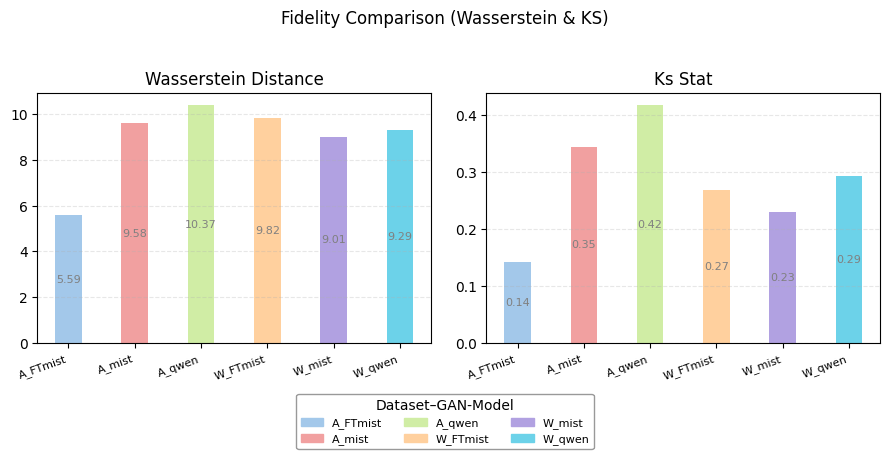

In [177]:
plot_fidelity_metrics(all_fresults,
                      features=["wasserstein_distance","ks_stat"],
                      title="Fidelity Comparison (Wasserstein & KS)")